In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

from warnings import filterwarnings
filterwarnings('ignore')

In [99]:
df_USarest=pd.read_csv("USArrests.csv")
df_USarest.index=df_USarest.iloc[:,0]
df_USarest=df_USarest.iloc[:,1:5]
df_USarest.index.name=None

In [100]:
df_USarest.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [101]:
df_USarest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [102]:
df_USarest.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [103]:
df_USarest.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<AxesSubplot:xlabel='Rape'>

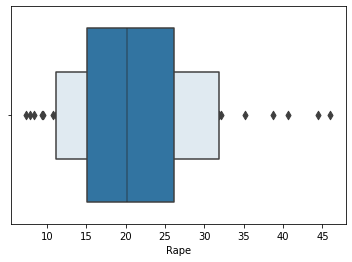

In [104]:
sns.boxenplot(x='Rape' ,data=df_USarest)

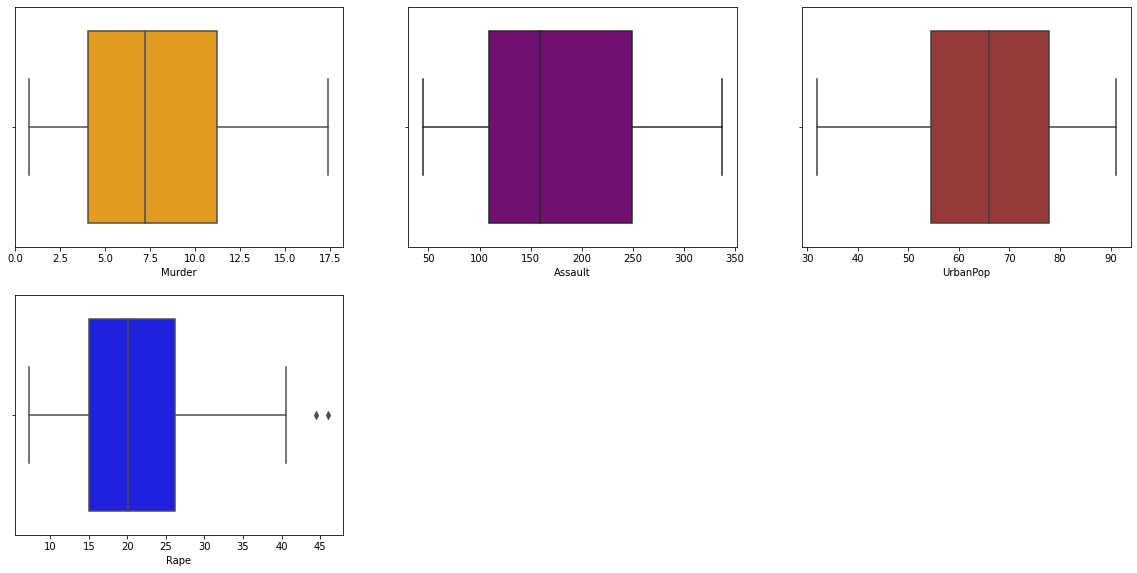

In [105]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= df_USarest.Murder, color='orange')

plt.subplot(3,3,2)
sns.boxplot(x= df_USarest.Assault, color='purple')

plt.subplot(3,3,3)
sns.boxplot(x= df_USarest.UrbanPop, color='brown')

plt.subplot(3,3,4)
sns.boxplot(x= df_USarest.Rape, color='blue')

plt.show()

# Treating Outliers Using IQR:

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In [106]:
df_USarest.shape

(50, 4)

In [107]:
from scipy.stats import iqr

Q1 = df_USarest.quantile(0.25)
Q3 = df_USarest.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Murder        7.175
Assault     140.000
UrbanPop     23.250
Rape         11.100
dtype: float64


In [110]:
cleandf_USarst = df_USarest[~((df_USarest < (Q1 - 1.5 * IQR)) |(df_USarest > (Q3 + 1.5 * IQR))).any(axis=1)]
cleandf_USarst.shape

(48, 4)

# Let's Plot The Box Plot Once Again To See if outliers are removed.¶


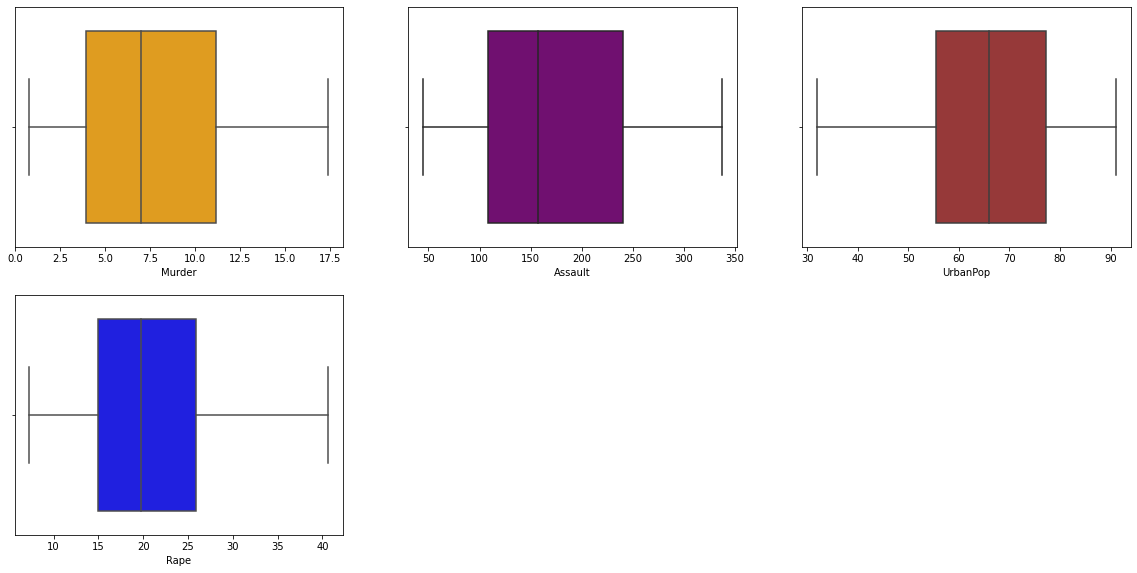

In [111]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= cleandf_USarst.Murder, color='orange')

plt.subplot(3,3,2)
sns.boxplot(x= cleandf_USarst.Assault, color='purple')

plt.subplot(3,3,3)
sns.boxplot(x= cleandf_USarst.UrbanPop, color='brown')

plt.subplot(3,3,4)
sns.boxplot(x= cleandf_USarst.Rape, color='blue')

plt.show()

# Using pca ALGO

In [112]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(cleandf_USarst)
scaled_data=scaler.transform(cleandf_USarst)

In [113]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(scaled_data)

In [114]:
pca_fit.shape

(48, 2)

In [120]:
# plt.scatter(pca_fit[:,0],pca_fit[:,1],cmap='plasma')

In [130]:
component_df = pd.DataFrame(data=pca_fit,columns= ["Principal Component 1","Principal Component 2"])
component_df.head()

,Principal Component 1,Principal Component 2
0,1.048793,1.200254
1,1.990168,-0.727546
2,-0.091436,1.114217
3,2.870727,-1.567958
4,1.823790,-1.072336


In [117]:
pca.explained_variance_ratio_

array([0.62958989, 0.25374106])

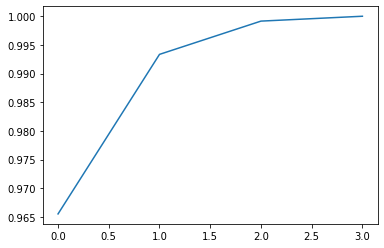

In [119]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));